In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [11]:
data = pd.read_excel("CTG.xls",2)

In [12]:
data.head()

FileName       Date      SegFile      b       e    LBE     LB   AC  \
0           NaN        NaT          NaN    NaN     NaN    NaN    NaN  NaN   
1  Variab10.txt 1996-12-01  CTG0001.txt  240.0   357.0  120.0  120.0  0.0   
2    Fmcs_1.txt 1996-05-03  CTG0002.txt    5.0   632.0  132.0  132.0  4.0   
3    Fmcs_1.txt 1996-05-03  CTG0003.txt  177.0   779.0  133.0  133.0  2.0   
4    Fmcs_1.txt 1996-05-03  CTG0004.txt  411.0  1192.0  134.0  134.0  2.0   

    FM   UC  ...    C    D    E   AD   DE   LD   FS  SUSP  CLASS  NSP  
0  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN    NaN  NaN  
1  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0    9.0  2.0  
2  0.0  4.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
3  0.0  5.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
4  0.0  6.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  

[5 rows x 40 columns]

In [13]:
dataset_rmvCol = data.drop(columns=['FileName', 'SegFile', 'Date'])

In [14]:
finaldata = dataset_rmvCol.dropna()

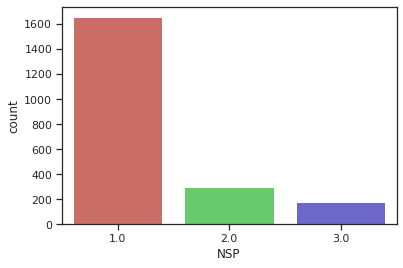

In [15]:
sns.countplot(x = 'NSP', data = finaldata, palette = 'hls')
plt.show()

In [16]:
X = finaldata[['b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV','DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax','Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS']]
y = finaldata['NSP']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [18]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_pred=logreg.predict(X_test)

In [20]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[405,   2,   0],
       [  6,  76,   0],
       [  0,   0,  43]])

In [21]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9849624060150376


In [22]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
auc = multiclass_roc_auc_score(y_test, y_pred, average="macro")
print("Area under curve : ", auc)

Area under curve :  0.9782451364890389
